<a href="https://colab.research.google.com/github/beepmo/gator/blob/main/data/07-27/La2_3_a_gating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import userdata
import plotly.express as px


# 1. Set up project in runtime
Create colab secrets for the following credentials for the repo to get runtime files and clone repo

In [2]:
!git config --global user.email {userdata.get('email')}
!git config --global user.name {userdata.get('name')}
!git clone https://{userdata.get('token')}@github.com/beepmo/gator
%pwd

Cloning into 'gator'...
remote: Enumerating objects: 1549, done.
remote: Counting objects: 100% (138/138), done.
remote: Compressing objects: 100% (120/120), done.
remote: Total 1549 (delta 93), reused 17 (delta 17), pack-reused 1411
Receiving objects: 100% (1549/1549), 104.30 MiB | 6.61 MiB/s, done.
Resolving deltas: 100% (915/915), done.
Updating files: 100% (197/197), done.


'/content'

### 24-07-25 La2/3-a gating

Gate voltage parameters :
- Amp : 5Vpp
- Offset : 500 mV
- Duty Cycle : 1%
- Power supply: 2V
Trying to tap off the gating electrode



# Takeaway

Together after a language exchange table, we saw that applying a large Vpp (4V setting) makes periodicity emerge. However, we do not see it in our data. Perhaps it didn't get saved!

In [17]:
%cd "/content/gator/data/07-27/"

/content/gator/data/07-27


In [4]:
# prompt: delete first 8 lines from full_buffer.csv

def prep_csv(filename):

  # Read the full buffer into a list of lines
  with open(filename, 'r') as f:
    lines = f.readlines()

  # print base time
  print(lines[2])

  # Delete the first 8 lines
  lines = lines[8:]

  # Write the remaining lines back to the file
  with open(filename, 'w') as f:
    f.writelines(lines)

In [18]:
# prep_csv('defbuffer1_0726_154305.csv')
df = pd.read_csv('defbuffer1_0726_154305.csv')


In [19]:
df

,Reading,Unit,Range Digits,Disp Digits,Math,Start Group,Limit1 High,Limit1 Low,Limit2 High,Limit2 Low,...,Questionable,Origin,Value,Unit.1,Digits,Output,Sense,Source Limit,Overtemp,Relative Time
0,0.000041,Amp DC,0.0001,5.5,F,F,F,F,F,F,...,F,Main,0.999966,Volt DC,1,T,2W,F,F,0.000000
1,0.000041,Amp DC,0.0001,5.5,F,F,F,F,F,F,...,F,Main,0.999964,Volt DC,1,T,2W,F,F,0.069379
2,0.000040,Amp DC,0.0001,5.5,F,F,F,F,F,F,...,F,Main,0.999964,Volt DC,1,T,2W,F,F,0.138725
3,0.000041,Amp DC,0.0001,5.5,F,F,F,F,F,F,...,F,Main,0.999967,Volt DC,1,T,2W,F,F,0.208051
4,0.000041,Amp DC,0.0001,5.5,F,F,F,F,F,F,...,F,Main,0.999966,Volt DC,1,T,2W,F,F,0.277388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93692,0.004814,Amp DC,0.0100,5.5,F,F,F,F,F,F,...,F,Main,0.999963,Volt DC,1,T,2W,F,F,6515.146463
93693,0.004815,Amp DC,0.0100,5.5,F,F,F,F,F,F,...,F,Main,0.999962,Volt DC,1,T,2W,F,F,6515.215790
93694,0.004815,Amp DC,0.0100,5.5,F,F,F,F,F,F,...,F,Main,0.999962,Volt DC,1,T,2W,F,F,6515.285121
93695,0.004817,Amp DC,0.0100,5.5,F,F,F,F,F,F,...,F,Main,0.999962,Volt DC,1,T,2W,F,F,6515.354454


In [20]:
# Time (s)
T = df['Relative Time']

# Current (nA)
I = df['Reading'] * 1e12

# Potential (mV)
V = df['Value'] * 1e3

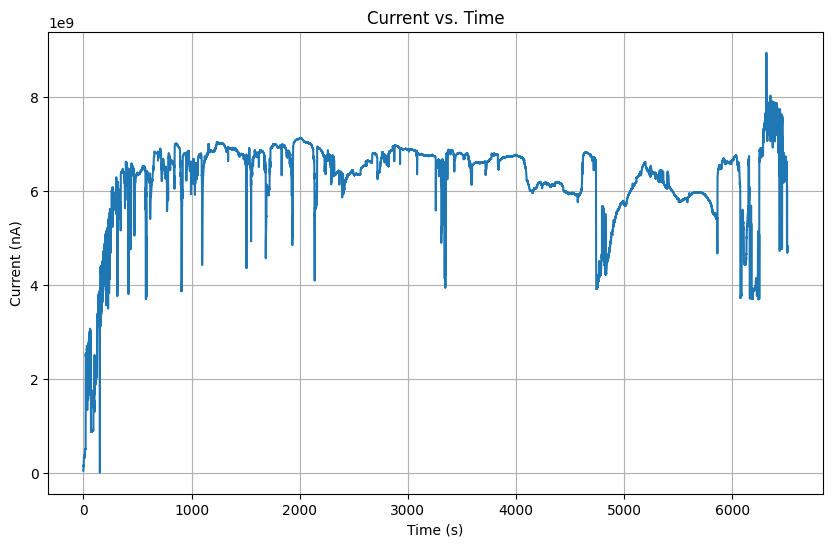

In [21]:
plt.figure(figsize=(10, 6))

plt.plot(T, I)

plt.xlabel('Time (s)')
plt.ylabel('Current (nA)')

plt.title('Current vs. Time')

plt.grid(True)
plt.show()


In [23]:
fig = px.scatter(df, x="Relative Time", y=["Reading"])
fig.show()


In [24]:
prep_csv('defbuffer1_0726_154732.csv')
df1 = pd.read_csv('defbuffer1_0726_154732.csv')


Fill Mode,1



In [25]:
fig = px.scatter(df1, x="Relative Time", y=["Reading"])
fig.show()
